# U-net


Based on this <a href="https://www.mdpi.com/2076-3417/9/3/404/htm#sec2-applsci-09-00404"> article</a> with implementation following this <a href="https://github.com/mrkolarik/3D-brain-segmentation/blob/master/3D-unet.py"> git</a> repository.

## 3D model

In [1]:
#Setting up the model

import os
import numpy as np
import keras
import tensorflow as tf

np.random.seed(256)
tf.set_random_seed(256)

from keras.models import Model
from keras.layers import (Input, concatenate, Conv3D, MaxPooling3D,
            Conv3DTranspose, AveragePooling3D, ZeroPadding3D)
from keras.optimizers import RMSprop, Adam, SGD
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras import backend as K
from keras.regularizers import l2
from keras.utils import plot_model

K.set_image_data_format('channels_last')

shape = (16,256,256,1) #because we have 1 channel

def get_unet():
    inputs = Input(shape)
    conv1 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling3D(pool_size=(2, 2, 2))(conv1)

    conv2 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling3D(pool_size=(2, 2, 2))(conv2)

    conv3 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling3D(pool_size=(2, 2, 2))(conv3)

    conv4 = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling3D(pool_size=(2, 2, 2))(conv4)

    conv5 = Conv3D(512, (3, 3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv3D(512, (3, 3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv3DTranspose(256, (2, 2, 2), strides=(2, 2, 2), padding='same')(conv5), conv4], axis=4)
    conv6 = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(conv6), conv3], axis=4)
    conv7 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(conv7), conv2], axis=4)
    conv8 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(conv8), conv1], axis=4)
    conv9 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv3D(1, (1, 1, 1), activation='sigmoid')(conv9)


    model = Model(inputs=[inputs], outputs=[conv10])

    #model.summary()

    model.compile(optimizer=Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.000000199), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    return model

Unet = get_unet()
Unet.save('Unet.h5')

print("We made a Unet model")

Using TensorFlow backend.
W0723 13:39:07.525150  3768 deprecation_wrapper.py:119] From c:\users\carine\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0723 13:39:07.566642  3768 deprecation.py:323] From c:\users\carine\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\nn_impl.py:181: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0723 13:39:07.630894  3768 deprecation_wrapper.py:119] From c:\users\carine\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0723 13:39:07.630894  3768 deprecation_wrapper.py:119] From c:\users\ca

We made a Unet model


## 2D model

In [7]:
#Make a 2D Unet

from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose

def get_unet2D():
    inputs = Input((256, 256, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)


    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.000000199), loss='binary_crossentropy', metrics=['accuracy'])

    return model

Unet2D = get_unet2D()
Unet2D.summary()
Unet2D.save('Unet2D.h5')

print("We made a 2D Unet model")

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 256, 256, 32) 320         input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_33 (Conv2D)              (None, 256, 256, 32) 9248        conv2d_32[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 128, 128, 32) 0           conv2d_33[0][0]                  
__________________________________________________________________________________________________
conv2d_34 

## Loading data

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

def get_data(Test_or_Train, img_type, n):
    imgs = []
    name = {'T1' : 'sub-{}_T1w.npy', 
            'grey' : 'c1sub-{}_T1w.npy', 
            'white' : 'c2sub-{}_T1w.npy',
            'csf' : 'c3sub-{}_T1w.npy'}
        
    for i in range(n):
        i += 1
        
        if Test_or_Train == 'Test':
            i += 60
        
        if i < 10:
            numb = '0' + str(i)
        else:
            numb = str(i)
        
        if img_type == 'T1':
            subfolder = 'imgs'
            filename = os.path.join(Test_or_Train,subfolder,name[img_type].format(numb))
        else: 
            subfolder = 'masks'
            filename = os.path.join(Test_or_Train,subfolder,img_type,name[img_type].format(numb))
            
        print('Loading {}'.format(name[img_type].format(numb)))
        
        img = np.load(filename)
        
        #Normalize the images to values in [0,1]
        imgNorm = img / img.max()
        imgNorm = np.expand_dims(imgNorm, axis = 3) #To add the channel dimension (of length 1)
        imgs.append(imgNorm)
        
    print('\n Loaded {} {} images of type {}'.format(n, Test_or_Train, img_type))
    print('-'*30)
    return imgs

x_train = get_data('Train', 'T1', 1)
print(x_train[0].dtype)
y_train = get_data('Train', 'grey', 1)
print(y_train[0].dtype)

#We only take the first 16 slices
x_cut = [x_train[0][0:15,:,:,:]]
y_cut = [y_train[0][0:15,:,:,:]]

Loading sub-01_T1w.npy

 Loaded 1 Train images of type T1
------------------------------
float32
Loading c1sub-01_T1w.npy

 Loaded 1 Train images of type grey
------------------------------
float32


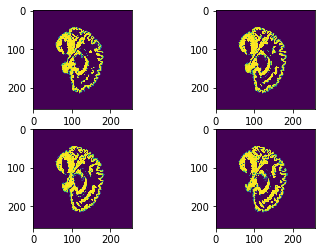

In [3]:
#Plot the data

fig = plt.figure('Brain data')
for i in range(4):
    y = fig.add_subplot(2,2,i+1)
    #new_image = 
    y.imshow(y_train[0][i+70,:,:,0])
plt.show()

## Testing model

In [4]:
from keras.models import load_model

testModel = load_model('trainedUnet2D.h5')

def testData(amount): #amount is the number of images to process
    x_test = get_data('Test', 'T1', amount) #array (176,256,256,1)
    y_test = get_data('Test', 'grey', amount)
    
    x_testcut = []
    y_testcut = []

    for i in range(176):
        x_testcut.append(x_test[0][i,:,:,:])
        y_testcut.append(y_test[0][i,:,:,:])
    return x_testcut, y_testcut #list of arrays (256,256,1)

x_testcut, y_testcut = testData(1)

Using TensorFlow backend.
W0723 16:31:56.441756  8328 deprecation_wrapper.py:119] From c:\users\carine\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0723 16:31:56.967458  8328 deprecation_wrapper.py:119] From c:\users\carine\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:2463: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 16:31:57.058423  8328 deprecation_wrapper.py:119] From c:\users\carine\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0723 16:31:57.059403  8328 deprecation_wrapper.py:119] From c:\users\carine\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:186: The name tf.Session is de

Loading sub-61_T1w.npy

 Loaded 1 Test images of type T1
------------------------------
Loading c1sub-61_T1w.npy

 Loaded 1 Test images of type grey
------------------------------


Start from: 40
Number of slices: 2


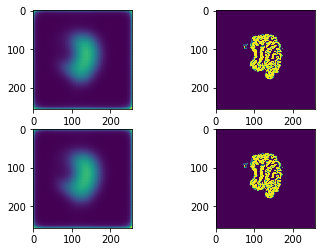

In [26]:
import numpy as np

def give_predictions(slice_list):
    y_pred = []
    j = 0
    for slice in slice_list :
        j += 1
        slice_pred = testModel.predict([[slice]])
        slice_pred = slice_pred.squeeze(axis = 3)
        slice_pred = slice_pred.squeeze(axis = 0)
        
        print("Working on slice {}".format(j))
        y_pred.append(slice_pred)
    return y_pred

#y_pred = give_predictions(x_testcut)

start = int(input("Start from: "))
n = int(input("Number of slices: "))
fig = plt.figure("Predicted segmentation")
for i in range(n):
    sub = fig.add_subplot(n,2,2*i+1)
    y_predNorm = y_pred[start+i] 
    sub.imshow(y_predNorm)
    
    sub2 = fig.add_subplot(n,2,2*i+2)
    y_testshow = y_testcut[start+1].squeeze(axis = 2)
    sub2.imshow(y_testshow)
    
plt.show()

In [47]:
import keras.backend as K
import tensorflow as tf

smooth = 1.

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

#y_pred list of 176 arrays (256,256)
#y_testcut list of 176 arrays (256,256,1)
dice = dice_coef(np.array(y_testcut), np.array(y_pred))
print('The Dice coefficient is {}'.format(dice))

The Dice coefficient is Tensor("truediv_7:0", shape=(), dtype=float32)


In [6]:
print(np.array(x_testcut).shape)
[loss, acc] = testModel.evaluate(np.array(x_testcut), np.array(y_testcut))
print("The accuracy is {}%".format(round(acc*100)))

(176, 256, 256, 1)
176/176 [==============================] - 61s 348ms/step
The accuracy is 91.0%
